In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
from sqlalchemy import create_engine, inspect

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [7]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

In [12]:
# Using the inspector to print the column names within the 'hawaii' table and its types
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

# Using the inspector to print the column names within the 'hawaii' table and its types
columns = inspector.get_columns('hawaii')
for column in columns:
    print(column["measurement"], column["station"])

In [13]:
# Display the row's columns and data in dictionary format
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23ae46b5d60>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [14]:
# Display the row's columns and data in dictionary format
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23ae0cb3be0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

('2016-07-01', 0.0)
('2016-07-02', 0.0)
('2016-07-03', 0.0)
('2016-07-04', 0.04)
('2016-07-05', 0.02)
('2016-07-06', 0.02)
('2016-07-07', 0.01)
('2016-07-08', 0.0)
('2016-07-09', 0.0)
('2016-07-10', 0.02)
('2016-07-11', 0.0)
('2016-07-12', 0.0)
('2016-07-13', 0.0)
('2016-07-14', 0.0)
('2016-07-15', 0.46)
('2016-07-16', 0.03)
('2016-07-17', 0.0)
('2016-07-18', 1.25)
('2016-07-19', 0.03)
('2016-07-20', 0.0)
('2016-07-21', 0.04)
('2016-07-22', 0.02)
('2016-07-23', 0.0)
('2016-07-24', 0.13)
('2016-07-25', 4.2)
('2016-07-26', 0.0)
('2016-07-27', 0.0)
('2016-07-28', 0.0)
('2016-07-29', 0.0)
('2016-07-30', 0.0)
('2016-07-31', 0.06)
('2016-08-01', 0.08)
('2016-08-02', 0.05)
('2016-08-03', 0.0)
('2016-08-04', 0.04)
('2016-08-05', 0.01)
('2016-08-06', 0.0)
('2016-08-07', 0.39)
('2016-08-08', 0.02)
('2016-08-09', 0.0)
('2016-08-10', 0.0)
('2016-08-11', 0.0)
('2016-08-12', 0.0)
('2016-08-13', 0.0)
('2016-08-14', 0.0)
('2016-08-15', 0.0)
('2016-08-16', 0.0)
('2016-08-17', 0.0)
('2016-08-18', 0.0)
(

<AxesSubplot:xlabel='date'>

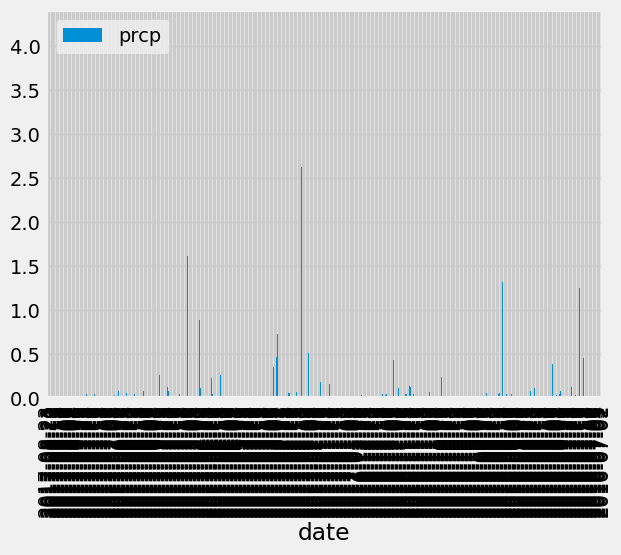

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.

date_str = "2016-07"
session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= date_str).all()

# Perform a query to retrieve the data and precipitation scores

last_12_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= date_str).group_by(measurement.date)
for x in last_12_prcp:
    print(x)

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(last_12_prcp)

# Sort the dataframe by date

sorted_prcp_df = df.sort_values("date", ascending=False)

# Use Pandas Plotting with Matplotlib to plot the data

sorted_prcp_df = sorted_prcp_df.set_index('date')
sorted_prcp_df.plot(kind="bar")


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_prcp_df.describe()

,prcp
count,417.000000
mean,0.060456
std,0.287415
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,4.200000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(station).count()

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(func.count(measurement.station), measurement.station)\
.group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()



[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter( measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date one year from the last date in data set.

date_str = "2016-07"
session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= date_str, measurement.station == 'USC00519281' ).all()

# Perform a query to retrieve the data and precipitation scores

last_12_tobs = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= date_str).group_by(measurement.tobs)
for x in last_12_tobs:
    print(x)



('2017-04-30', 58.0)
('2017-02-02', 59.0)
('2017-01-08', 60.0)
('2017-02-02', 61.0)
('2016-12-16', 62.0)
('2017-01-03', 63.0)
('2017-01-06', 64.0)
('2017-01-14', 65.0)
('2016-12-12', 66.0)
('2016-12-06', 67.0)
('2016-11-29', 68.0)
('2016-12-03', 69.0)
('2016-12-09', 70.0)
('2016-11-07', 71.0)
('2016-07-11', 72.0)
('2016-11-26', 73.0)
('2016-11-24', 74.0)
('2016-09-04', 75.0)
('2016-07-18', 76.0)
('2016-07-03', 77.0)
('2016-07-05', 78.0)
('2016-07-01', 79.0)
('2016-07-07', 80.0)
('2016-08-08', 81.0)
('2016-09-23', 82.0)
('2017-06-12', 83.0)
('2016-08-26', 84.0)
('2017-08-19', 85.0)
('2017-05-23', 87.0)


array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

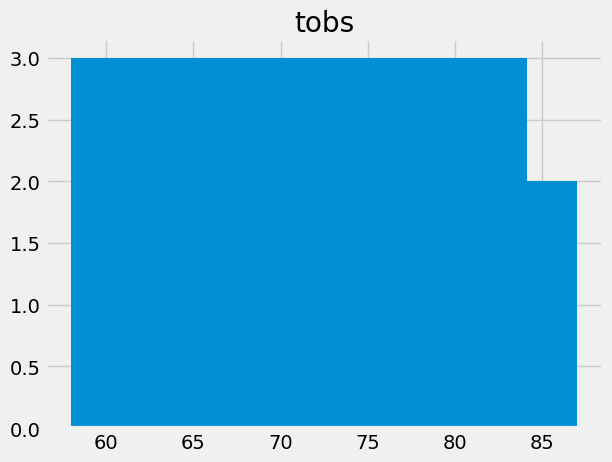

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_df = pd.DataFrame(last_12_tobs)

# Sort the dataframe by date

sorted_tobs_df = tobs_df.sort_values('date', ascending=False)

# Use Pandas Plotting with Matplotlib to plot the data

sorted_tobs_df.hist() 



# Close session

In [25]:
# Close Session
session.close()